# **Regression Basic**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'height_weight_dataset.csv')
df = df.astype(int)
df.head()

,Height_cm,Weight_kg
0,174,89
1,168,89
2,175,96
3,182,100
4,168,90


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Height_cm  100 non-null    int64
 1   Weight_kg  100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [4]:
df.describe()

,Height_cm,Weight_kg
count,100.000000,100.000000
mean,168.680000,91.910000
std,7.226327,7.562661
min,149.000000,75.000000
25%,165.000000,87.000000
50%,168.500000,91.000000
75%,173.250000,96.000000
max,184.000000,113.000000


<Axes: xlabel='Weight_kg'>

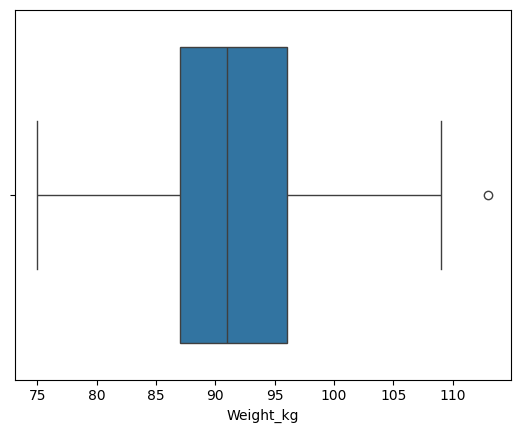

In [5]:
sns.boxplot(x = df['Weight_kg'])

<Axes: xlabel='Height_cm'>

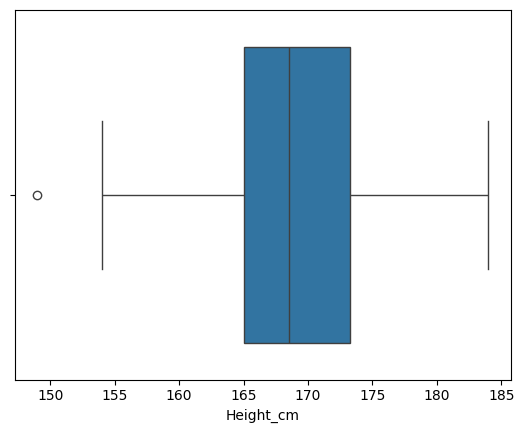

In [6]:
sns.boxplot(x = df['Height_cm'])

<Axes: xlabel='Weight_kg', ylabel='Height_cm'>

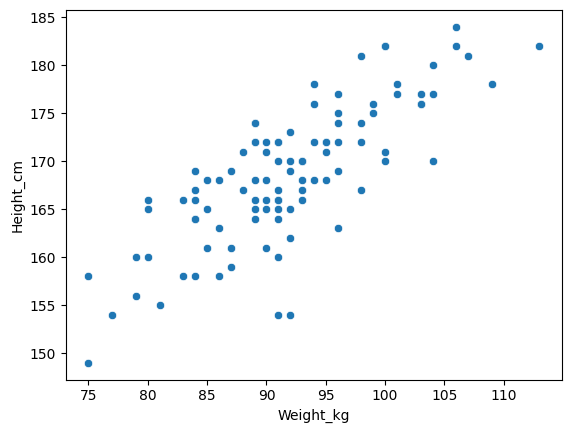

In [7]:
sns.scatterplot(x='Weight_kg' , y = 'Height_cm', data=df)

<Axes: >

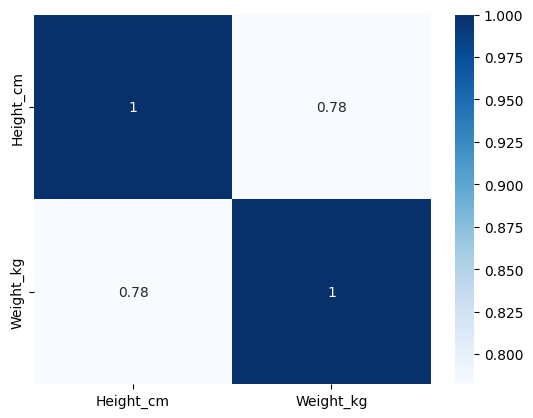

In [8]:
# finding correaltion

sns.heatmap(df.corr(),annot=True,cmap="Blues")

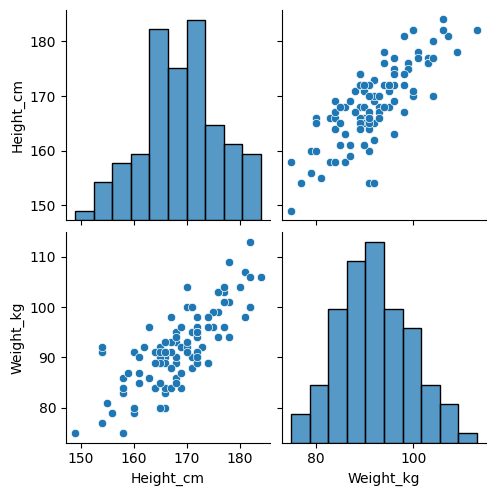

In [9]:
sns.pairplot(df)

In [10]:
# step 1 - dividing dataset into X(independent) , y(dependent) 
# X should be dataframe or 2d array 

X = df[['Weight_kg']] 
X


,Weight_kg
0,89
1,89
2,96
3,100
4,90
...,...
95,84
96,90
97,95
98,93


In [11]:
# y can be one dimentional array
y = df['Height_cm']
y

0     174
1     168
2     175
3     182
4     168
     ... 
95    158
96    172
97    172
98    170
99    168
Name: Height_cm, Length: 100, dtype: int64

# train test split

In [12]:
 

from sklearn.model_selection import train_test_split

X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [13]:
X_train.shape

(75, 1)

In [14]:
X_test.shape

(25, 1)

# Standardization 

In [15]:
# To reach global minima we will use z score formula to all the data point to make the size 0 to 1
# . So it will make it faster

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [16]:
X_train = scaler.fit_transform(X_train)

In [17]:
# we are doing this separately because test data should not know anything about train publish_display_data
# it is a concept of data leakage
X_test = scaler.transform(X_test)

In [18]:
# Apply Linear Regression

from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [19]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
ce = regression.coef_[0]
print("Co-Efficient or Slope = ",ce)

Co-Efficient or Slope =  5.958756904932447


In [21]:
ic = regression.intercept_
print("Intercept = ",ic)

Intercept =  168.68


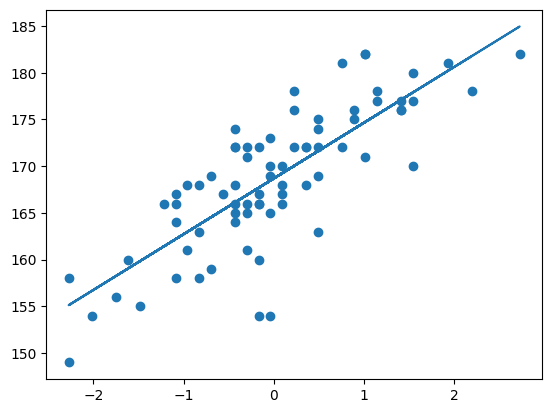

In [22]:
# plot best fit line 

plt.scatter(X_train,y_train)
plt.plot(X_train, regression.predict(X_train))

In [23]:
# prediction for the test data

y_pred = regression.predict(X_test)


In [24]:
# Performance Metrix

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [25]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(mse,mae,rmse,sep="\n")

18.753377526803572
3.740569738058547
4.3305170045623385


In [26]:
# Calculating r2 score 
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)
print(r2 * 100)


50.82706429664275


In [27]:
# adjusted r2 score

1 - (1 - r2)*(len(y_test) - 1)/(len(y_test) - X_test.shape[1]-1)

0.4868911057040982

# OLS Implementation

In [28]:
import statsmodels.api as sm

In [29]:
model = sm.OLS(y_train,X_train).fit()

In [30]:
prediction = model.predict(X_test)
print(prediction)

[ -0.99373806   4.49797227  -0.99373806  -0.99373806  -7.26997843
  -3.3473282    6.06703236   1.35985208  -9.62356857  -2.56279815
  -0.20920801  -9.62356857  10.77421263  -4.13185824  -0.99373806
  -1.7782681    0.57532203   4.49797227   2.14438213  10.77421263
   2.92891217  -5.70091834 -10.40809861  -6.48544838  -6.48544838]


In [31]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              Height_cm   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.012
Method:                 Least Squares   F-statistic:                            0.09228
Date:                Thu, 07 Aug 2025   Prob (F-statistic):                       0.762
Time:                        17:45:06   Log-Likelihood:                         -491.05
No. Observations:                  75   AIC:                                      984.1
Df Residuals:                      74   BIC:                                      986.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Predition for new data

In [32]:
regression.predict(scaler.transform([[72]]))

array([152.78019106])